In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [2]:
path="/home/mano/Manoj/Learning/time_series/data/time-series-analysis/Time Series Analysis/Exponential Smoothing and Holt Winters/weekly_customer_complaints.csv"

In [3]:
# Load data and setting index
df = pd.read_csv(path, index_col="week", parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [4]:
# Data analysis
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaints               261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


complaints                 0
discount_rate              0
small_commercial_event     0
medium_commercial_event    0
big_commercial_event       0
dtype: int64

In [5]:
df['complaints'] = df['complaints'].str.replace(',','').astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   complaints               261 non-null    float64
 1   discount_rate            261 non-null    object 
 2   small_commercial_event   261 non-null    int64  
 3   medium_commercial_event  261 non-null    int64  
 4   big_commercial_event     261 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 12.2+ KB


In [6]:
df.index
# frequency is none - need to add frequency
# setting frequency to 'W' implies that the week starts on Sunday
df = df.asfreq('W-Mon')
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

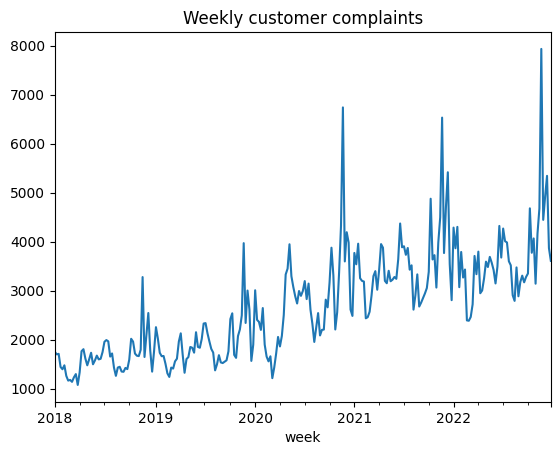

In [7]:
df["complaints"].plot(title="Weekly customer complaints")
plt.show()

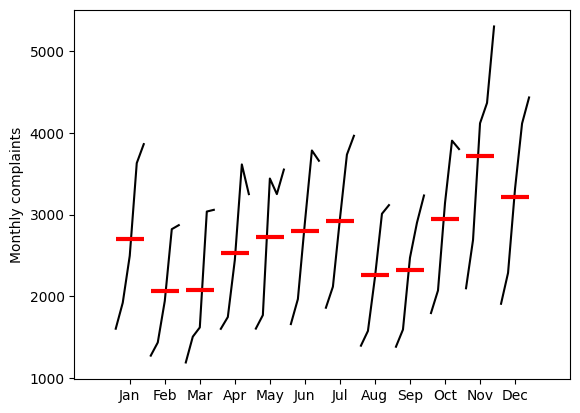

In [8]:
# Plotting the monthly seasonlity

month_plot(df['complaints'].resample('ME').mean(), ylabel="Monthly complaints")
plt.show()

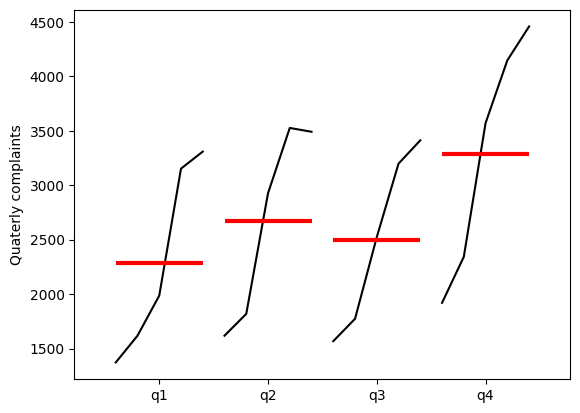

In [9]:
# Plotting the quaterly seasonlity
quarter_plot(df['complaints'].resample("QE").mean(), ylabel="Quaterly complaints")
plt.show()

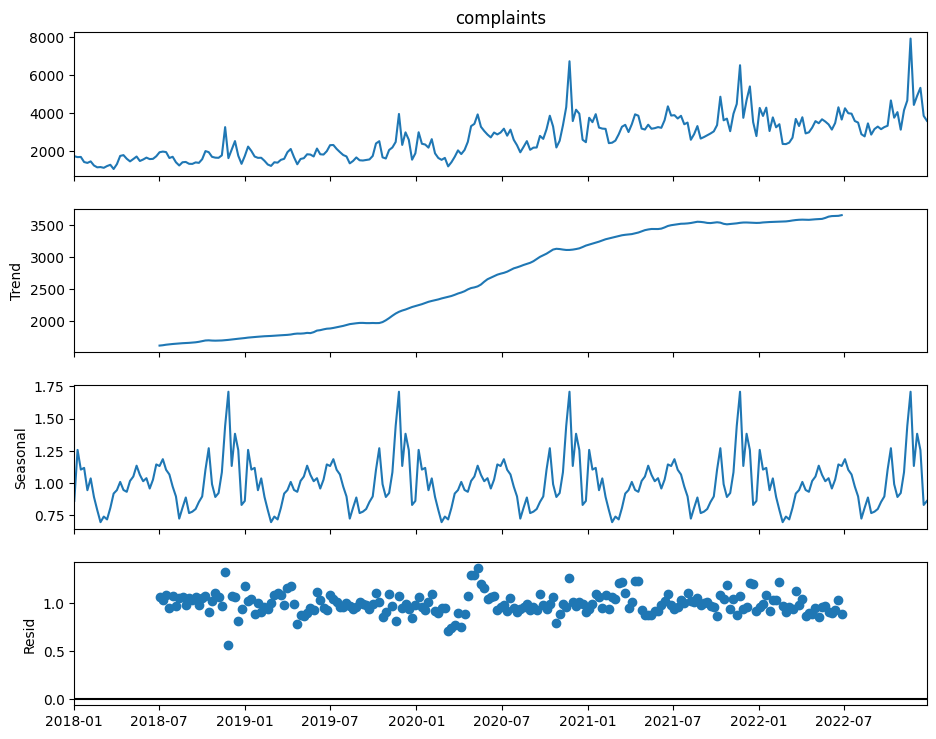

In [10]:
# Seasonal decomposition for bit coin data
decomposition = seasonal_decompose(df['complaints'], model='mul', period=52)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

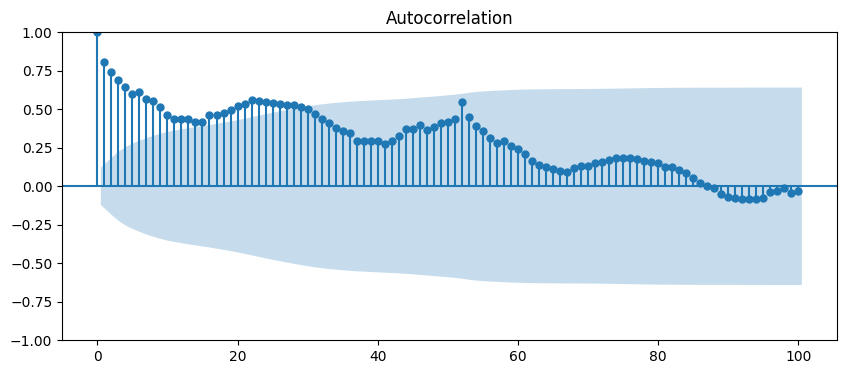

In [11]:
# Auto correlation
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(df['complaints'], lags=100, ax=ax)
plt.show()

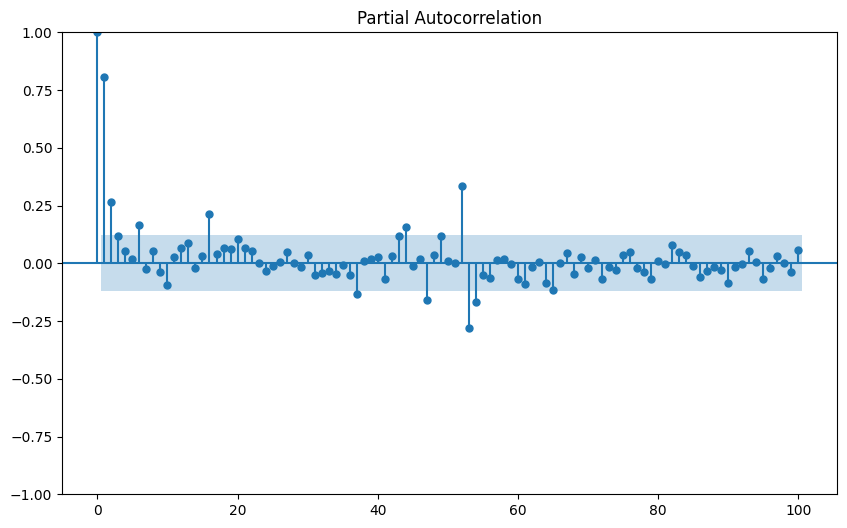

In [12]:
# Partial auto correlation
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df['complaints'], lags=100, ax=ax)
plt.show()

In [13]:
# Train and test data split
periods = 13
train, test = df.iloc[:-periods, 0], df.iloc[-periods:, 0]
train.head()

week
2018-01-01    1750.0
2018-01-08    1701.0
2018-01-15    1711.0
2018-01-22    1443.0
2018-01-29    1397.0
Freq: W-MON, Name: complaints, dtype: float64

# Simple Exponential smoothing
*importing from holtwinters*

In [14]:
# simple exponential smoothing model and prediction
model_simple = SimpleExpSmoothing(train).fit()
prediction_simple = model_simple.forecast(len(test))

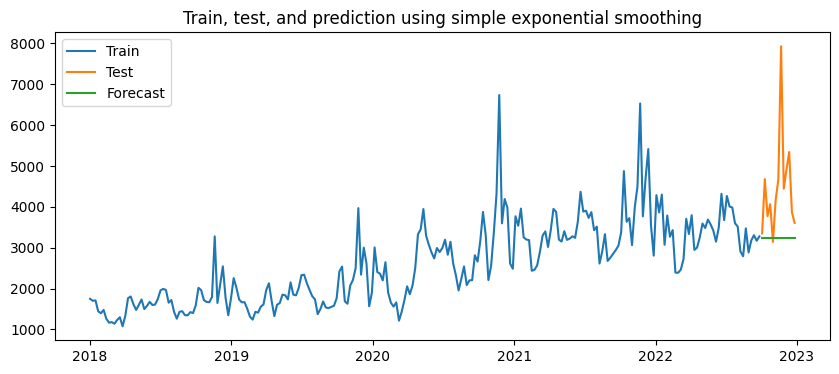

In [16]:
# Plot train, test, and forecast
plt.figure(figsize=(10, 4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(prediction_simple, label="Forecast")
plt.title("Train, test, and prediction using simple exponential smoothing")
plt.legend()
plt.show()

In [17]:
# Double exponential smoothing model
model_double = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
prediction_double = model_double.forecast(len(test))
prediction_double

2022-10-03    3248.185861
2022-10-10    3254.075094
2022-10-17    3259.964326
2022-10-24    3265.853559
2022-10-31    3271.742791
2022-11-07    3277.632024
2022-11-14    3283.521256
2022-11-21    3289.410488
2022-11-28    3295.299721
2022-12-05    3301.188953
2022-12-12    3307.078186
2022-12-19    3312.967418
2022-12-26    3318.856651
Freq: W-MON, dtype: float64

[]

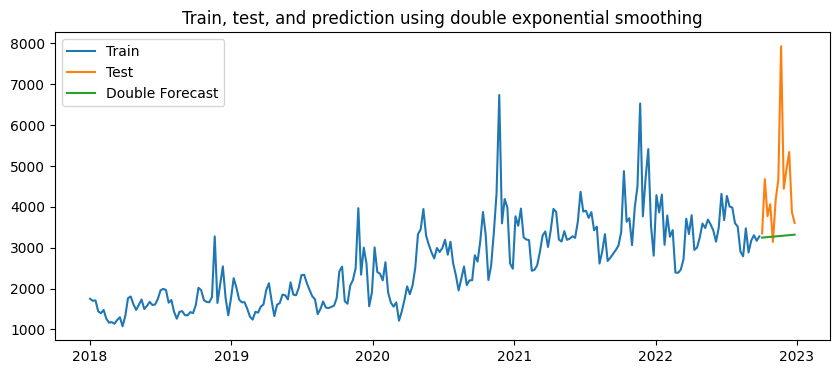

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(prediction_double, label="Double Forecast")
plt.legend()
plt.title("Train, test, and prediction using double exponential smoothing")
plt.plot()

In [19]:
# Triple Exponential model
model_triple = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=52).fit()
prediction_triple = model_triple.forecast(len(test))
prediction_triple

2022-10-03    4041.184848
2022-10-10    5040.706528
2022-10-17    3931.974337
2022-10-24    3531.214414
2022-10-31    3441.152374
2022-11-07    4260.179210
2022-11-14    5352.727848
2022-11-21    7238.175501
2022-11-28    4359.052986
2022-12-05    5316.570856
2022-12-12    5271.400531
2022-12-19    3471.850158
2022-12-26    3336.598455
Freq: W-MON, dtype: float64

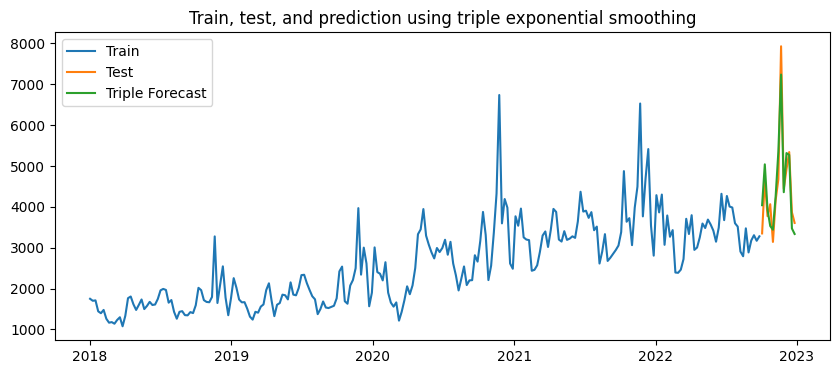

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(prediction_triple, label="Triple Forecast")
plt.legend()
plt.title("Train, test, and prediction using triple exponential smoothing")
plt.show()

In [21]:
# Calculation MAE, RMSE, and MAPE - errors

mae = mean_absolute_error(test, prediction_triple)
rmse = root_mean_squared_error(test, prediction_triple)
mape = mean_absolute_percentage_error(test, prediction_triple)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f}%")

The MAE is 363.71
The RMSE is 425.50
The MAPE is 8.44%


In [22]:
# Function to assess model and visualize output
def model_assessment(train, test, prediction, title):
    plt.figure(figsize=(10, 4))
    plt.plot(train, label="Train")
    plt.plot(test, label="Test")
    plt.plot(prediction, label="Forecast")
    plt.legend()
    plt.title(f"Train, test, and prediction using {title}")
    plt.show()

    mae = mean_absolute_error(test, prediction)
    rmse = root_mean_squared_error(test, prediction)
    mape = mean_absolute_percentage_error(test, prediction)

    print(f"The MAE is {mae:.2f}")
    print(f"The RMSE is {rmse:.2f}")
    print(f"The MAPE is {100 * mape:.2f}%")


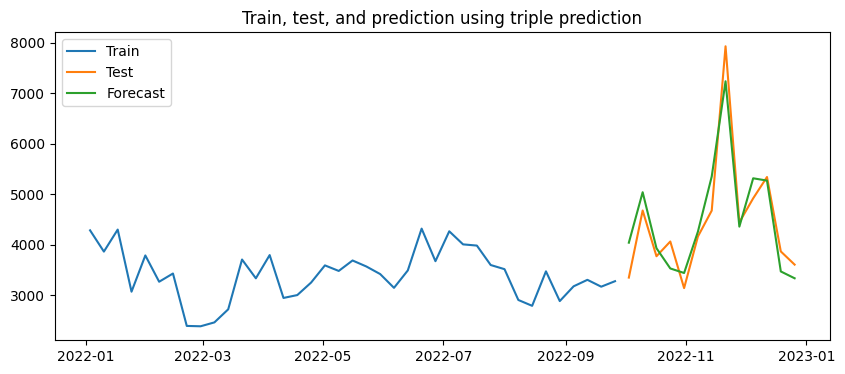

The MAE is 363.71
The RMSE is 425.50
The MAPE is 8.44%


In [23]:
# model_assessment(train, test, prediction_simple, "simple prediction")
# model_assessment(train, test, prediction_double, "double prediction")
model_assessment(train['2022'], test, prediction_triple, "triple prediction")

# Predicting Future

In [ ]:
# Triple Exponential model
model = ExponentialSmoothing(df.complaints, # to predict future
                                     trend='add', seasonal='mul', seasonal_periods=52).fit()
forecast = model.forecast(13)
forecast

2023-01-02    4965.846359
2023-01-09    4478.082913
2023-01-16    4699.508939
2023-01-23    3814.119881
2023-01-30    4242.025667
2023-02-06    3726.293680
2023-02-13    3385.543309
2023-02-20    2879.466532
2023-02-27    2978.594153
2023-03-06    3044.201065
2023-03-13    3430.492051
2023-03-20    3923.841902
2023-03-27    3794.568089
Freq: W-MON, dtype: float64

In [25]:
# Plot training and forecast
def plot_future(y, forecast, title):
    plt.figure(figsize=(10, 4))
    plt.plot(y, label="Train")
    plt.plot(forecast, label="Forecast")
    plt.legend()
    plt.title(f"Train and forecast with {title}")
    plt.show()

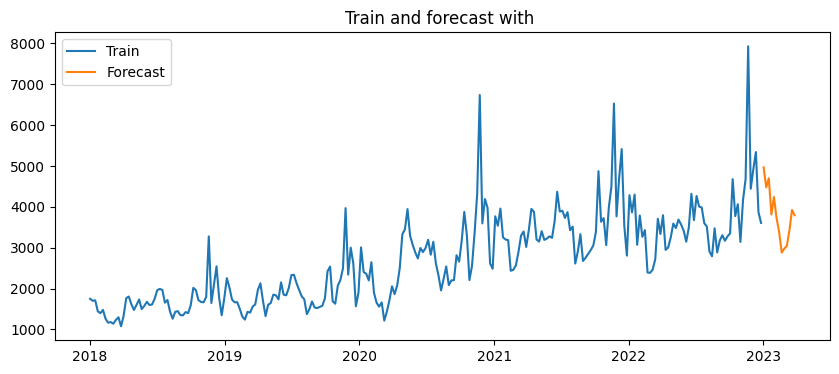

In [26]:
plot_future(df.complaints, forecast, "")

# Daily data


In [27]:
df_daily = pd.read_csv("/home/mano/Manoj/Learning/time_series/data/time-series-analysis/Time Series Analysis/Introduction to Time Series Forecasting/bitcoin_price.csv", index_col="Date", parse_dates=True)
df_daily

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014


In [28]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 to 2023-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3392 non-null   float64
 1   High       3392 non-null   float64
 2   Low        3392 non-null   float64
 3   Close      3392 non-null   float64
 4   Adj Close  3392 non-null   float64
 5   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.5 KB


In [29]:
df_daily = df_daily.asfreq('D')
df_daily.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq='D')

In [30]:
# Train and split
b_train, b_test = df_daily.iloc[:-30, 3], df_daily.iloc[-30:, 3]
b_test.head()

Date
2023-12-01    38688.750000
2023-12-02    39476.332031
2023-12-03    39978.390625
2023-12-04    41980.097656
2023-12-05    44080.648438
Freq: D, Name: Close, dtype: float64

In [33]:
b_model_simple = SimpleExpSmoothing(b_train).fit()
b_prediction_simple = b_model_simple.forecast(len(b_test))
b_prediction_simple

2023-12-01    37716.52404
2023-12-02    37716.52404
2023-12-03    37716.52404
2023-12-04    37716.52404
2023-12-05    37716.52404
2023-12-06    37716.52404
2023-12-07    37716.52404
2023-12-08    37716.52404
2023-12-09    37716.52404
2023-12-10    37716.52404
2023-12-11    37716.52404
2023-12-12    37716.52404
2023-12-13    37716.52404
2023-12-14    37716.52404
2023-12-15    37716.52404
2023-12-16    37716.52404
2023-12-17    37716.52404
2023-12-18    37716.52404
2023-12-19    37716.52404
2023-12-20    37716.52404
2023-12-21    37716.52404
2023-12-22    37716.52404
2023-12-23    37716.52404
2023-12-24    37716.52404
2023-12-25    37716.52404
2023-12-26    37716.52404
2023-12-27    37716.52404
2023-12-28    37716.52404
2023-12-29    37716.52404
2023-12-30    37716.52404
Freq: D, dtype: float64

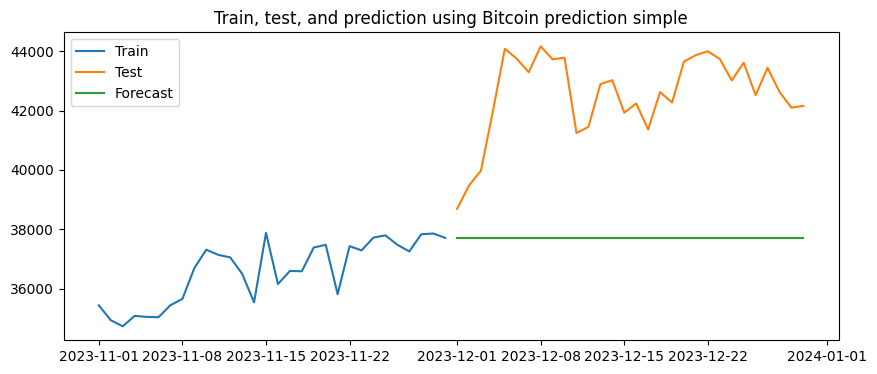

The MAE is 4839.76
The RMSE is 5026.69
The MAPE is 11.28%


In [40]:
model_assessment(b_train['2023-11'], b_test, b_prediction_simple, "Bitcoin prediction simple")

In [41]:
b_model_double = ExponentialSmoothing(b_train, trend="mul", seasonal=None).fit()
b_prediction_double = b_model_double.forecast(len(b_test))
b_prediction_double

2023-12-01    37710.563425
2023-12-02    37705.282170
2023-12-03    37700.001654
2023-12-04    37694.721877
2023-12-05    37689.442840
2023-12-06    37684.164542
2023-12-07    37678.886983
2023-12-08    37673.610163
2023-12-09    37668.334083
2023-12-10    37663.058741
2023-12-11    37657.784138
2023-12-12    37652.510274
2023-12-13    37647.237148
2023-12-14    37641.964761
2023-12-15    37636.693113
2023-12-16    37631.422202
2023-12-17    37626.152030
2023-12-18    37620.882596
2023-12-19    37615.613899
2023-12-20    37610.345941
2023-12-21    37605.078720
2023-12-22    37599.812237
2023-12-23    37594.546492
2023-12-24    37589.281484
2023-12-25    37584.017213
2023-12-26    37578.753680
2023-12-27    37573.490884
2023-12-28    37568.228825
2023-12-29    37562.967503
2023-12-30    37557.706917
Freq: D, dtype: float64

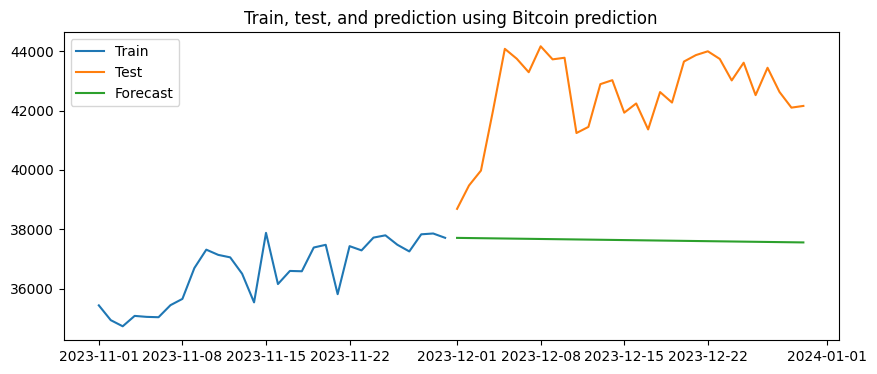

The MAE is 4922.20
The RMSE is 5110.63
The MAPE is 11.47%


In [42]:
model_assessment(b_train['2023-11'], b_test, b_prediction_double, "Bitcoin prediction")

In [46]:
b_model_triple = ExponentialSmoothing(b_train, trend="add", seasonal="mul", seasonal_periods=7).fit()
b_prediction_triple = b_model_triple.forecast(len(b_test))
b_prediction_triple

2023-12-01    37772.510340
2023-12-02    37824.824020
2023-12-03    37849.943107
2023-12-04    37849.619297
2023-12-05    37828.091306
2023-12-06    37904.596012
2023-12-07    37703.767779
2023-12-08    37763.517492
2023-12-09    37815.818412
2023-12-10    37840.931211
2023-12-11    37840.607172
2023-12-12    37819.084000
2023-12-13    37895.570183
2023-12-14    37694.789465
2023-12-15    37754.524644
2023-12-16    37806.812803
2023-12-17    37831.919315
2023-12-18    37831.595047
2023-12-19    37810.076694
2023-12-20    37886.544353
2023-12-21    37685.811152
2023-12-22    37745.531796
2023-12-23    37797.807194
2023-12-24    37822.907419
2023-12-25    37822.582921
2023-12-26    37801.069388
2023-12-27    37877.518524
2023-12-28    37676.832838
2023-12-29    37736.538949
2023-12-30    37788.801585
Freq: D, dtype: float64

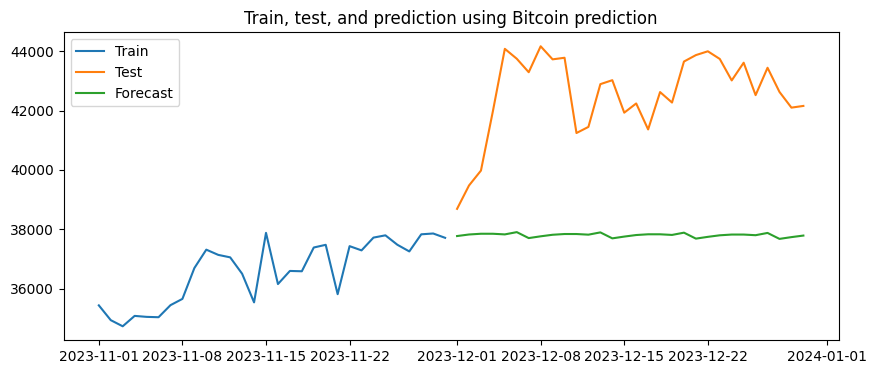

The MAE is 4753.60
The RMSE is 4945.05
The MAPE is 11.08%


In [47]:
model_assessment(b_train['2023-11'], b_test, b_prediction_triple, "Bitcoin prediction")